In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
df = pd.read_csv('../Healthcare-Diabetes.csv')
df=df.drop('Id',axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [34]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [35]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           18                             0.65
BloodPressure                                     125                            4.52
SkinThickness                                     800                            28.90
Insulin                                           1330                           48.05
BMI                                               39                             1.41
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [36]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [37]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


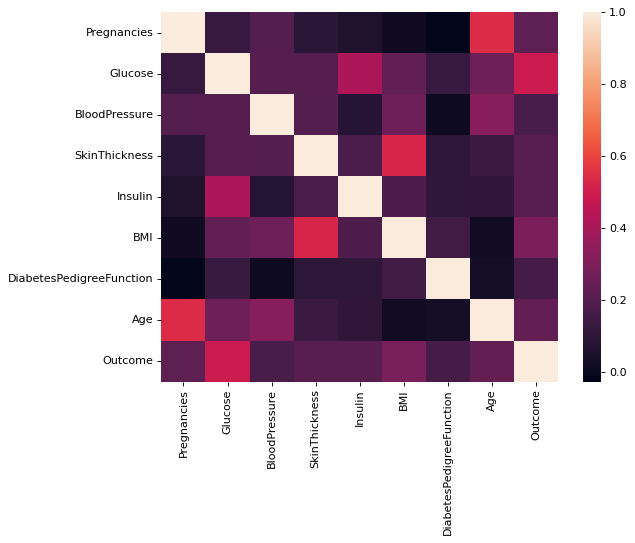

In [38]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

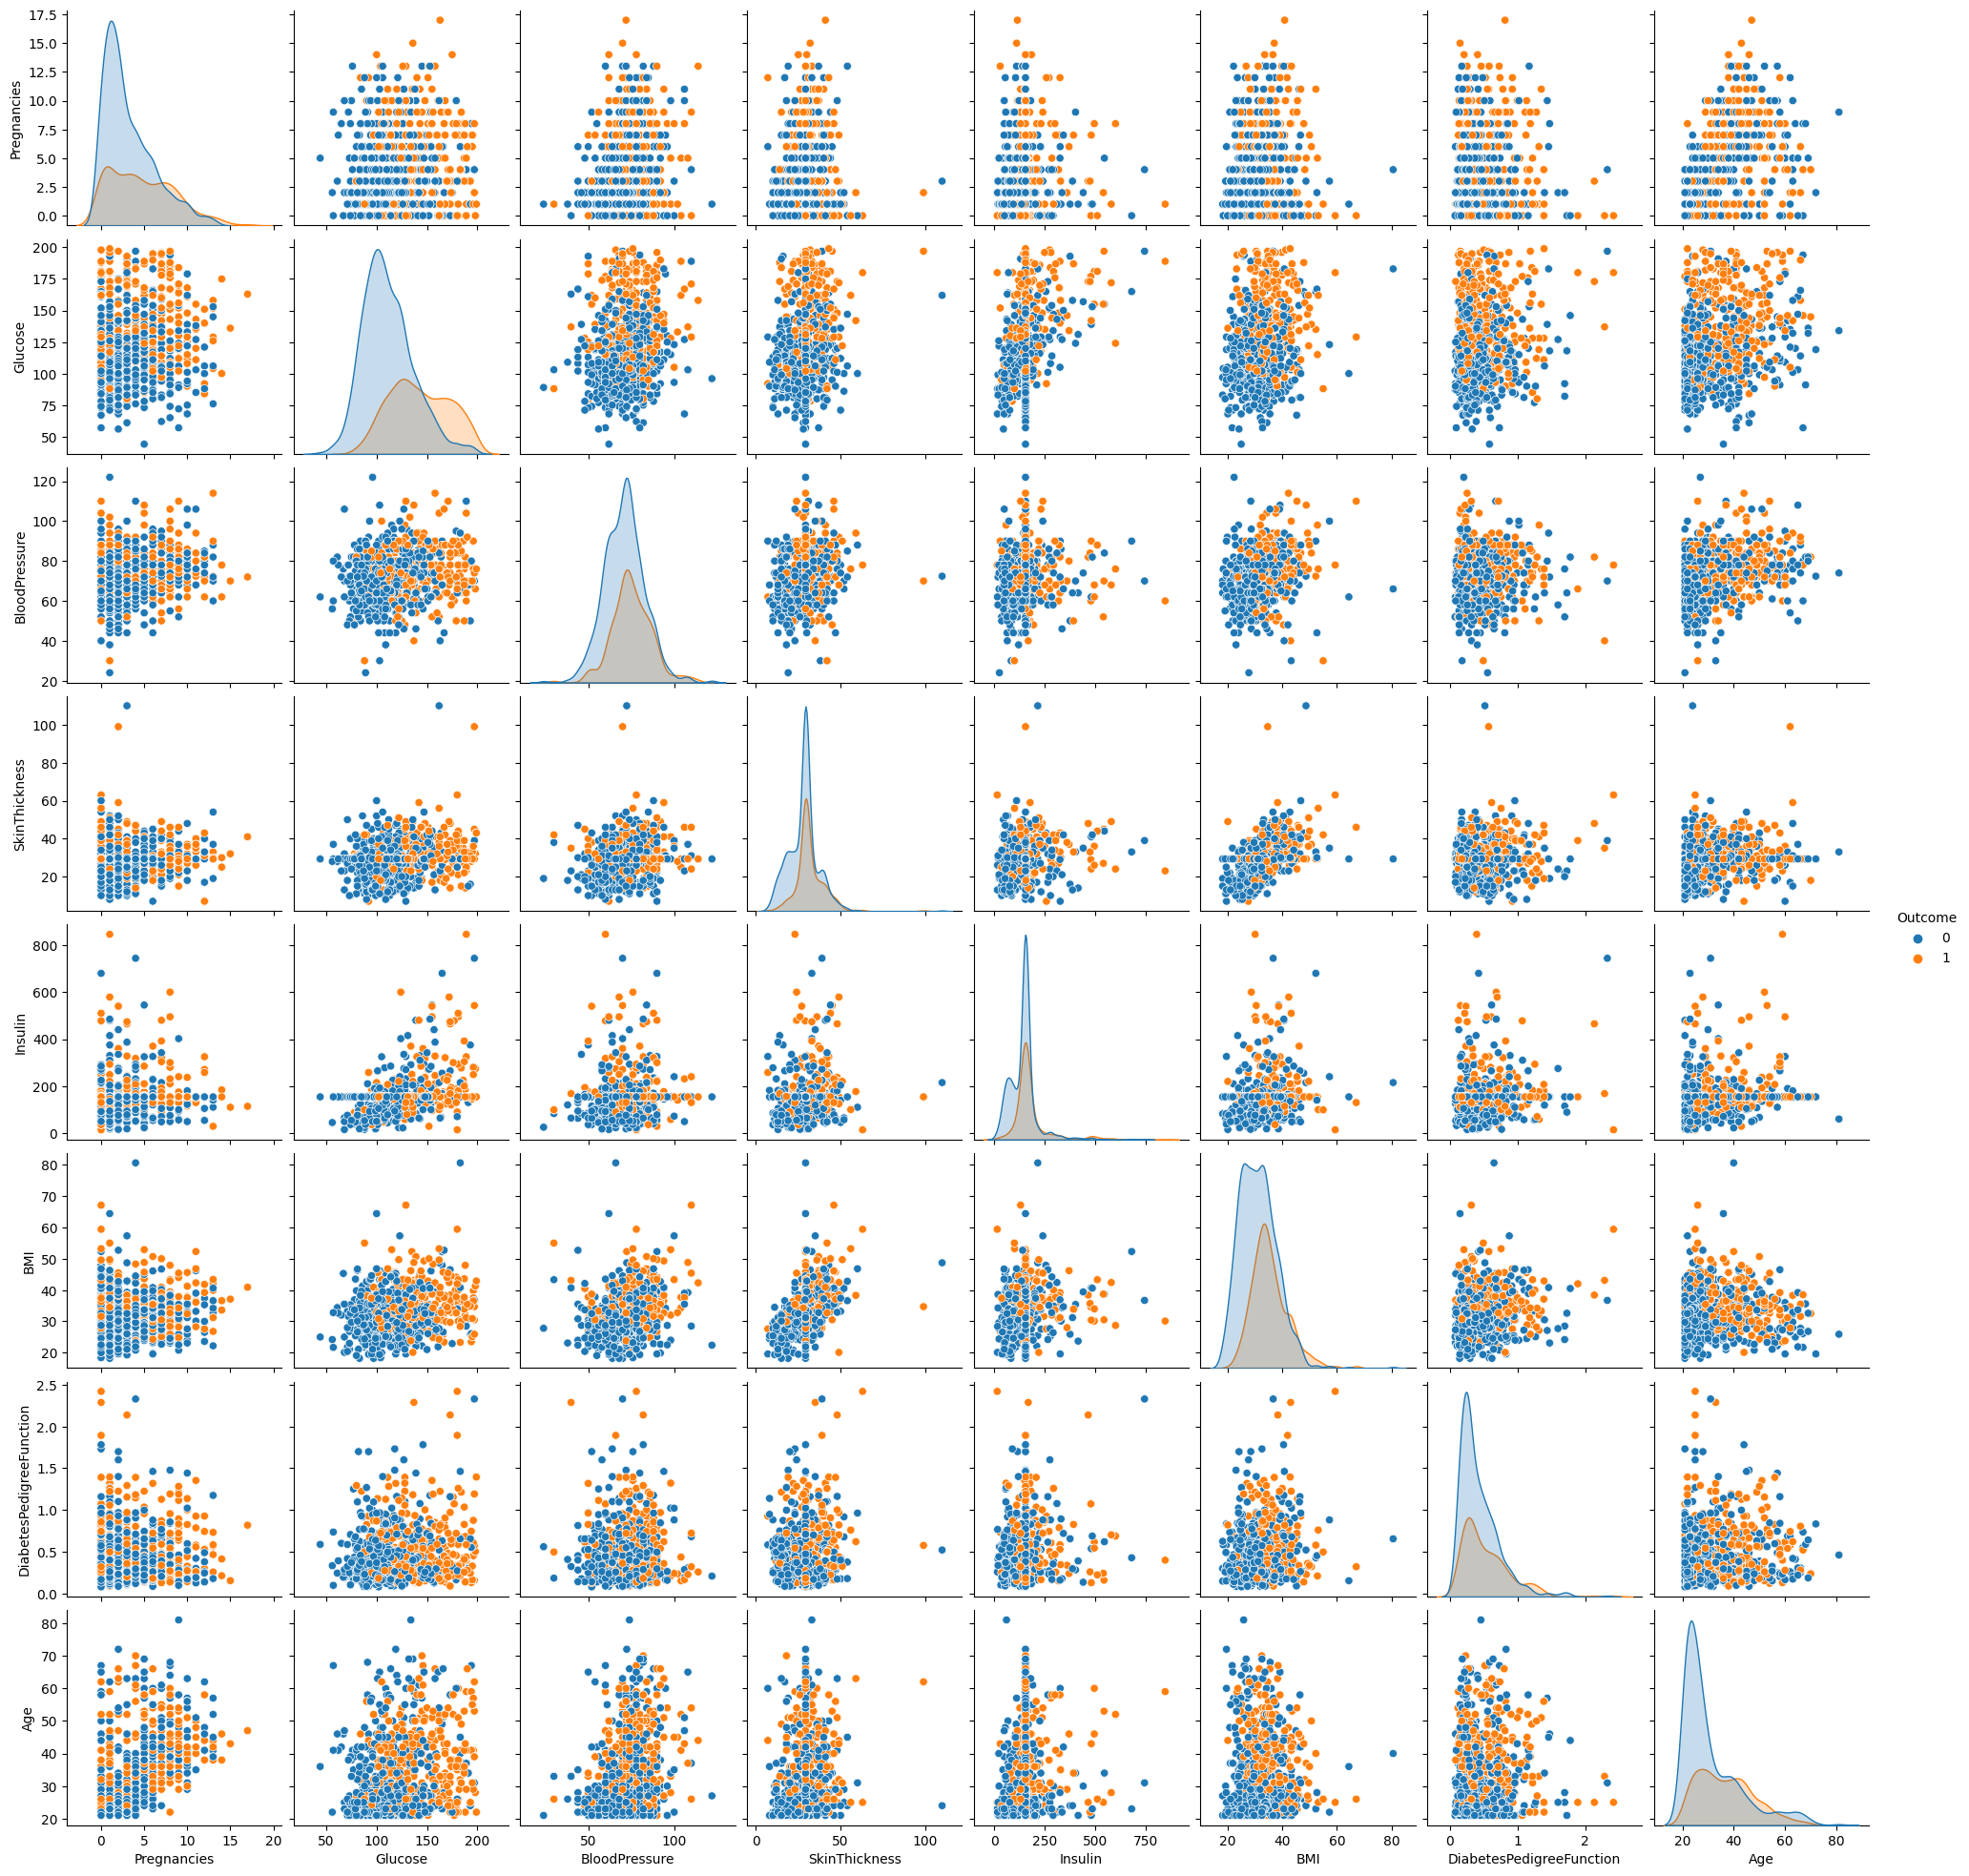

In [39]:
sns.pairplot(df,hue='Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

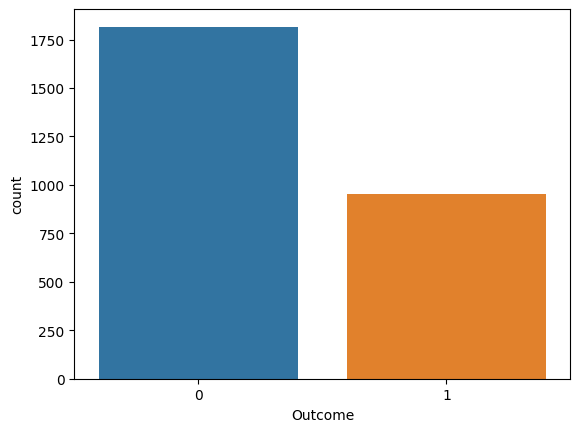

In [40]:
sns.countplot(x="Outcome", data=df)

In [41]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [43]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log_loss")

clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [48]:
import joblib

joblib.dump(clf, 'diabetics-prediction-lr.joblib')

['diabetics-prediction-lr.joblib']

In [47]:
model = joblib.load('diabetics-prediction-lr.joblib')

Pregnancies = 5
Glucose = 40
BloodPressure = 60
SkinThickness = 57
Insulin = 20
BMI = 40
DiabetesPedigreeFunction = 0.672
Age = 10


df = pd.DataFrame({
    'Pregnancies': [Pregnancies],
    'Glucose': [Glucose],
    'BloodPressure': [BloodPressure],
    'SkinThickness': [SkinThickness],
    'Insulin': [Insulin],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
    'Age': [Age]
})

# Make the prediction
prediction = model.predict_proba(df)
pred = prediction[0][1] * 100
print(pred)

2.7368896487365136e-284
